# Working with numpy Matrices (Multidimensional Data)

### 1. Downloaded and successfully imported the 2 datasets into this notebook from 'https://github.com/gagolews/teaching-data/tree/master/marek' 


The Datasets are, 'nhanes_adult_female_bmx_2020.csv' and 'nhanes_adult_male_bmx_2020.csv'

In [5]:
import numpy as np
column_names = ['BMXWT', 'BMXHT', 'BMXARML', 'BMXLEG', 'BMXARMC', 'BMXHIP', 'BMXWAIST']
file_female = r'C:\Users\fahee\Dataset\archive\nhanes_adult_female_bmx_2020.csv'
file_male = r'C:\Users\fahee\Dataset\archive\nhanes_adult_male_bmx_2020.csv'
female = np.genfromtxt(file_female, delimiter=',', skip_header=1)
male = np.genfromtxt(file_male, delimiter=',', skip_header=1)

### 2.  Reading the two files as numpy matrices named male and female. Each matrix consists 
of seven columns:
1. weight (kg),
2. standing height (cm),
3. upper arm length (cm),
4. upper leg length (cm),
5. arm circumference (cm),
6. hip circumference (cm),
7. waist circumference (cm)

 Before that, i am checking for missing values in the dataset and remove the missing values(if there's any) by cleaning dataset. After cleaning the datasets, the numpy matrices are named as male_cleaned and female_cleaned.

In [6]:
# Verifying if the data is correctly imported.
print("Female data shape:", female.shape)
print("Male data shape:", male.shape)

# Removing rows with empty values from the female dataset
female_clean = female[~np.isnan(female).any(axis=1)]

# Removing rows with empty values from the male dataset
male_clean = male[~np.isnan(male).any(axis=1)]
print("\nFirst few rows of female dataset:")
print(female_clean[:5])
print("\nFirst few rows of male dataset:")
print(male_clean[:5])

Female data shape: (4222, 7)
Male data shape: (4082, 7)

First few rows of female dataset:
[[ 97.1 160.2  34.7  40.8  35.8 126.1 117.9]
 [ 91.1 152.7  33.5  33.   38.5 125.5 103.1]
 [ 73.  161.2  37.4  38.   31.8 106.2  92. ]
 [ 61.7 157.4  38.   34.7  29.  101.   90.5]
 [ 55.4 154.6  34.6  34.   28.3  92.5  73.2]]

First few rows of male dataset:
[[ 98.8 182.3  42.   40.1  38.2 108.2 120.4]
 [ 74.3 184.2  41.1  41.   30.2  94.5  86.8]
 [103.7 185.3  47.   44.   32.  107.8 109.6]
 [ 86.  167.8  39.5  38.4  29.  106.4 108.3]
 [ 99.4 181.6  40.4  39.9  36.  120.2 107. ]]


### 3. On a single plot (use matplotlib.pytplot.subplot), drawing two histograms: for female weights (top subfigure). and for male weights (bottom subfigure) Call matplotlib.pyplot.xlim to make the xaxis limits identical for both subfigures (work out the appropriate limits yourself).

Using matplotlib.pyplot, drawing 2 histograms for both male and female weights.

After using the matplotlib.pyplot for drawing the 2 histograms for both and female weights, from matplotlib.pyplot, i call the function xlim() to make the x-axis of the graph similar to both the figures (male & female),

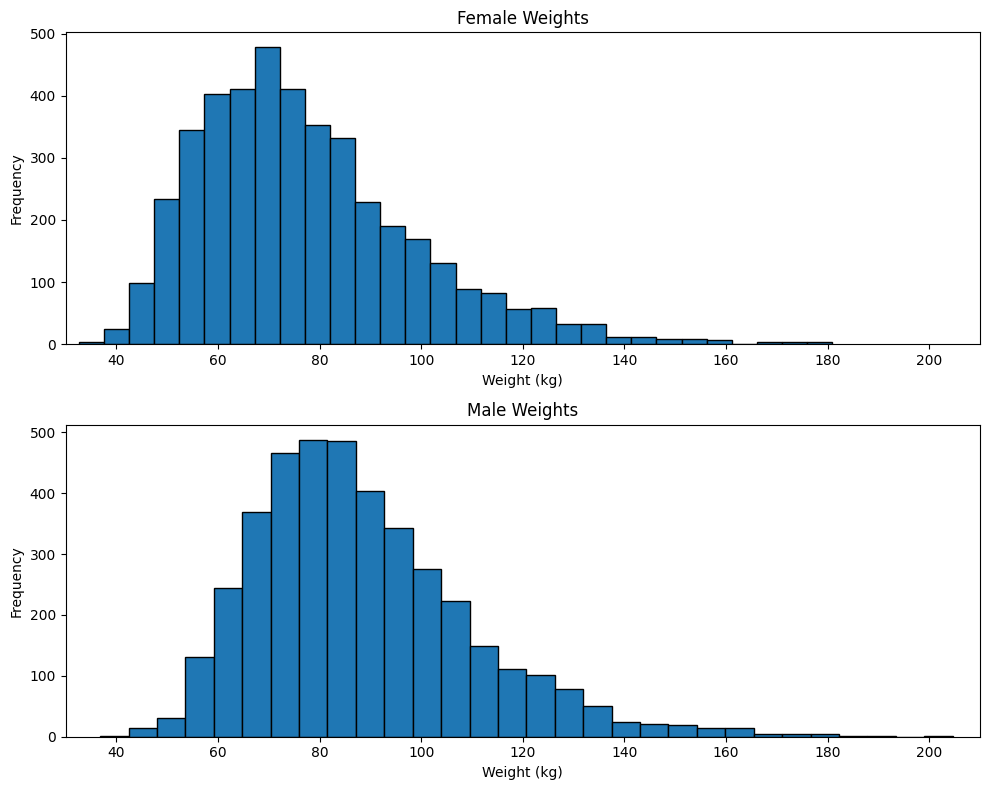

In [8]:
# Calculating the overall minimum weight and maximum weight for both datasets
min_weight = min(np.min(female_clean[:, 0]), np.min(male_clean[:, 0]))
max_weight = max(np.max(female_clean[:, 0]), np.max(male_clean[:, 0]))

# Round the above calculated values to nearest 10 for similar limits
x_min = np.floor(min_weight / 10) * 10
x_max = np.ceil(max_weight / 10) * 10

plt.figure(figsize=(10, 8))

plt.subplot(2, 1, 1)
plt.hist(female_clean[:, 0], bins=30, edgecolor='black')
plt.title('Female Weights')
plt.xlabel('Weight (kg)')
plt.ylabel('Frequency')
plt.xlim(x_min, x_max)  

plt.subplot(2, 1, 2)
plt.hist(male_clean[:, 0], bins=30, edgecolor='black')
plt.title('Male Weights')
plt.xlabel('Weight (kg)')
plt.ylabel('Frequency')
plt.xlim(x_min, x_max)  
plt.tight_layout()
plt.show()

### 4.  Call matplotlib.pyplot.boxplot to draw a box-and-whisker plot, with two boxes side by side, giving the male and female weights so that they can be compared to each other. Note that the boxplot function can be fed with a list of two vectors like [female_weights, male_weights]. In your own words, discuss the results.

Before plotting the boxplots for both male and female weights, i have provided a cleaned matrices and named them as 'female_weights_clean' and 'male_weights_clean' just to make sure that there are no missing values in the given matrices.

C:\Users\fahee\AppData\Local\Temp\ipykernel_29040\2329114945.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([female_weights_clean, male_weights_clean], labels=['Female', 'Male'])


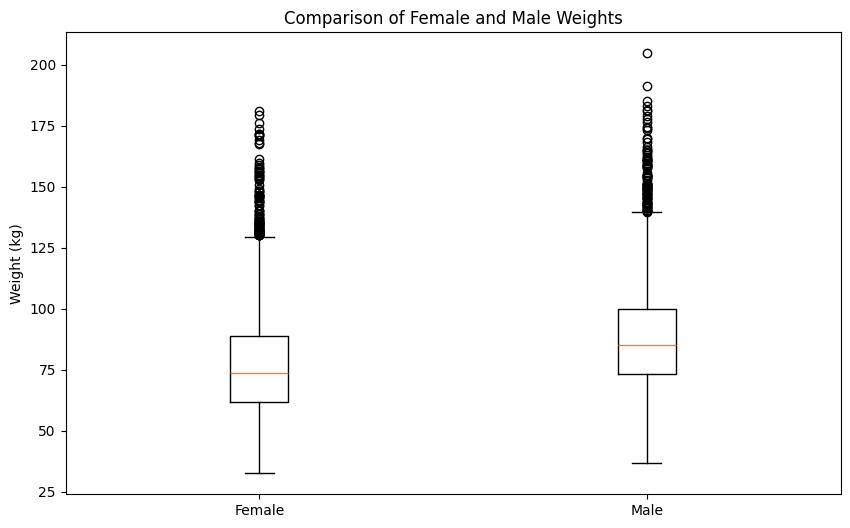

In [13]:
# Remove rows with empty values in the weight column of the datasets
female_weights_clean = female[:, 0][~np.isnan(female[:, 0])]
male_weights_clean = male[:, 0][~np.isnan(male[:, 0])]

# Plotting the boxplots for both the above mentioned weights
plt.figure(figsize=(10, 6))
plt.boxplot([female_weights_clean, male_weights_clean], labels=['Female', 'Male'])
plt.title('Comparison of Female and Male Weights')
plt.ylabel('Weight (kg)')
plt.show()


From the boxplots, we can infer that;

###### Central Tendency:
###### The median weight for males (represented by the orange line in the box) is noticeably higher than for females. This suggests that, on average, males in this dataset are heavier than females.

###### Range:

###### The overall range (from minimum to maximum) is larger for males than for females. Both distributions have several outliers, particularly on the upper end.

###### Outliers:

###### There are more outliers on the upper end for both genders, but males have a greater number of high outliers. These outliers represent individuals with exceptionally high weights relative to their respective gender distributions

###### Spread:

###### The box for males is larger than for females, indicating a greater interquartile range (IQR). This suggests more variability in male weights compared to female weights.

### 5. Compute the basic numerical aggregates of the male and female weights (measures of location, dispersion, and shape). In your own words, describe and compare the two distributions (e.g., are they left skewed, which one has more dispersion, and so forth).

Importing libraries such as skew and kurtosis from the package scipy.stats which makes it easier for the calculation of skewness and kurtosis.

 At first, I calculate the measures of location such as MEAN & MEDIAN using the 'mean' & 'median' present in the library numpy which makes it easier for the calculation.

Next, I calculate the measures of dispersion such as STANDARD DEVIATION & VARIANCE using the 'std' & 'var' functions present in the library numpy which makes it easier for the calculation.

Next, I calculate the measures of shape such as SKEWNESS & KURTOSIS using the 'skew' & 'kurtosis' functions present in the libraries skew & kurtosis from the package scipy.stats which makes it easier for the calculation.

In [14]:
from scipy.stats import skew, kurtosis

# Measures of location (Mean & Median)
mean_female = np.mean(female_weights_clean)
median_female = np.median(female_weights_clean)
mean_male = np.mean(male_weights_clean)
median_male = np.median(male_weights_clean)

# Measures of dispersion (Standard Deviation & Variance)
std_female = np.std(female_weights_clean)
var_female = np.var(female_weights_clean)
std_male = np.std(male_weights_clean)
var_male = np.var(male_weights_clean)

# Measures of shape (Skewness & Kurtosis)
skew_female = skew(female_weights_clean)
kurtosis_female = kurtosis(female_weights_clean)
skew_male = skew(male_weights_clean)
kurtosis_male = kurtosis(male_weights_clean)

print("Female Weights - Mean: {:.2f}, Median: {:.2f}, Std: {:.2f}, Variance: {:.2f}, Skewness: {:.2f}, Kurtosis: {:.2f}".format(
    mean_female, median_female, std_female, var_female, skew_female, kurtosis_female))
print("Male Weights - Mean: {:.2f}, Median: {:.2f}, Std: {:.2f}, Variance: {:.2f}, Skewness: {:.2f}, Kurtosis: {:.2f}".format(
    mean_male, median_male, std_male, var_male, skew_male, kurtosis_male))

Female Weights - Mean: 77.40, Median: 73.60, Std: 21.54, Variance: 464.08, Skewness: 1.03, Kurtosis: 1.40
Male Weights - Mean: 88.36, Median: 85.00, Std: 21.42, Variance: 458.77, Skewness: 0.98, Kurtosis: 1.47


From the above output we can conclude that;

Female Weights:

###### Mean: 77.40 kg
###### Median: 73.60 kg
###### Standard Deviation: 21.54 kg
###### Variance: 464.08 kg²
###### Skewness: 1.03
###### Kurtosis: 1.40

Male Weights:

###### Mean: 88.36 kg
###### Median: 85.00 kg
###### Standard Deviation: 21.42 kg
###### Variance: 458.77 kg²
###### Skewness: 0.98
###### Kurtosis: 1.47

From interpreting the results, we can conclude that;

###### Central Tendency:

###### The mean and median weights for males are higher than for females. This indicates that, on average, males in the dataset weigh more than females. The closeness of the mean and median values in both distributions suggests that the data is not heavily skewed.

###### Dispersion:

###### Both distributions have similar standard deviations and variances, indicating that the spread or dispersion of weights around the mean is similar for both males and females. The standard deviation for females is 21.54 kg, and for males, it is 21.42 kg, showing a slightly wider spread for female weights.

###### Skewness:

###### The skewness for females is 1.03, and for males, it is 0.98. Both values are positive, indicating that both distributions are right-skewed. The female weight distribution is slightly more skewed than the male weight distribution.

###### Kurtosis:

###### The kurtosis for females is 1.40, and for males, it is 1.47. Both values are greater than 0, indicating that both distributions are leptokurtic. The male weight distribution has a slightly higher kurtosis, suggesting a slightly sharper peak and heavier tails compared to the female weight distribution.

### 6. To the female matrix, add the eight column which gives the body mass indices of all the female participants.

First, I calculate the body mass index of the female participants.

After calculating the body mass index of the female participants, I create another column called BMI and assign the values in the column.

In [20]:
# Calculating Body Mass Index
female_bmi = female_weights_clean / (female_heights_clean / 100) ** 2

# Adding Body Mass Index column to the female matrix
female_with_bmi = np.column_stack((female_clean, female_bmi))

print("\nFirst few rows of female dataset with BMI:")
print(female_with_bmi[:5])



First few rows of female dataset with BMI:
[[ 97.1        160.2         34.7         40.8         35.8
  126.1        117.9         37.83504078]
 [ 91.1        152.7         33.5         33.          38.5
  125.5        103.1         39.06972037]
 [ 73.         161.2         37.4         38.          31.8
  106.2         92.          28.09265496]
 [ 61.7        157.4         38.          34.7         29.
  101.          90.5         24.90437849]
 [ 55.4        154.6         34.6         34.          28.3
   92.5         73.2         23.17879132]]


### 7. Create a new matrix zfemale being a version of the female dataset with all its columns standardised (by computing the z-scores of each column).

To standardize the female dataset, I am computing the z-scores of each column in the female dataset.

In [21]:
import numpy as np
from scipy.stats import zscore
# Remove rows with any empty values to get the standardized output
female_clean = female_with_bmi[~np.isnan(female_with_bmi).any(axis=1)]

# Standardize the cleaned female dataset
zfemale = zscore(female_clean, axis=0)

print("\nFirst few rows of standardized female dataset (zfemale):")
print(zfemale[:5])


First few rows of standardized female dataset (zfemale):
[[ 0.91429508  0.00895038 -0.56739463  1.13298804  0.55084546  1.08316157
   1.11578462  0.9969677 ]
 [ 0.63577599 -1.05306843 -1.07893145 -1.29349161  1.03221804  1.04475528
   0.265089    1.15617483]
 [-0.2044233   0.15055289  0.5835632   0.26194406 -0.1622991  -0.19064688
  -0.37293272 -0.25927501]
 [-0.7289676  -0.38753664  0.83933161 -0.76464348 -0.66150029 -0.52350135
  -0.45915188 -0.67039085]
 [-1.02141265 -0.78402366 -0.6100227  -0.98240447 -0.78630059 -1.06759039
  -1.45354609 -0.89289859]]


### 8. Draw a scatterplot matrix (pairplot) for the standardised versions of height, weight, waist circumference, hip circumference, and BMI of the females (based on zfemale). Compute Pearson’s and Spearman’s correlation coefficients for all pairs of variables. Interpret the obtained results. 

Using seaborn to draw a scatterplot matrix for the standardized versions of height, weight, waist circumference, hip circumference, and BMI based on the zfemale calculated in the above program.

After drawing the scatterplot, I calculate the Pearson's Correlation Coefficients & Spearman's Correlation Coefficients using the method 'pearson' & 'spearman' by importing the libraries 'pearsonr' & 'spearmanr' from the package scipy.stats which makes it easier for the calculations. 

Later I perform interpretation of both the mentioned correlation coefficients among the attributes given in the dataset.

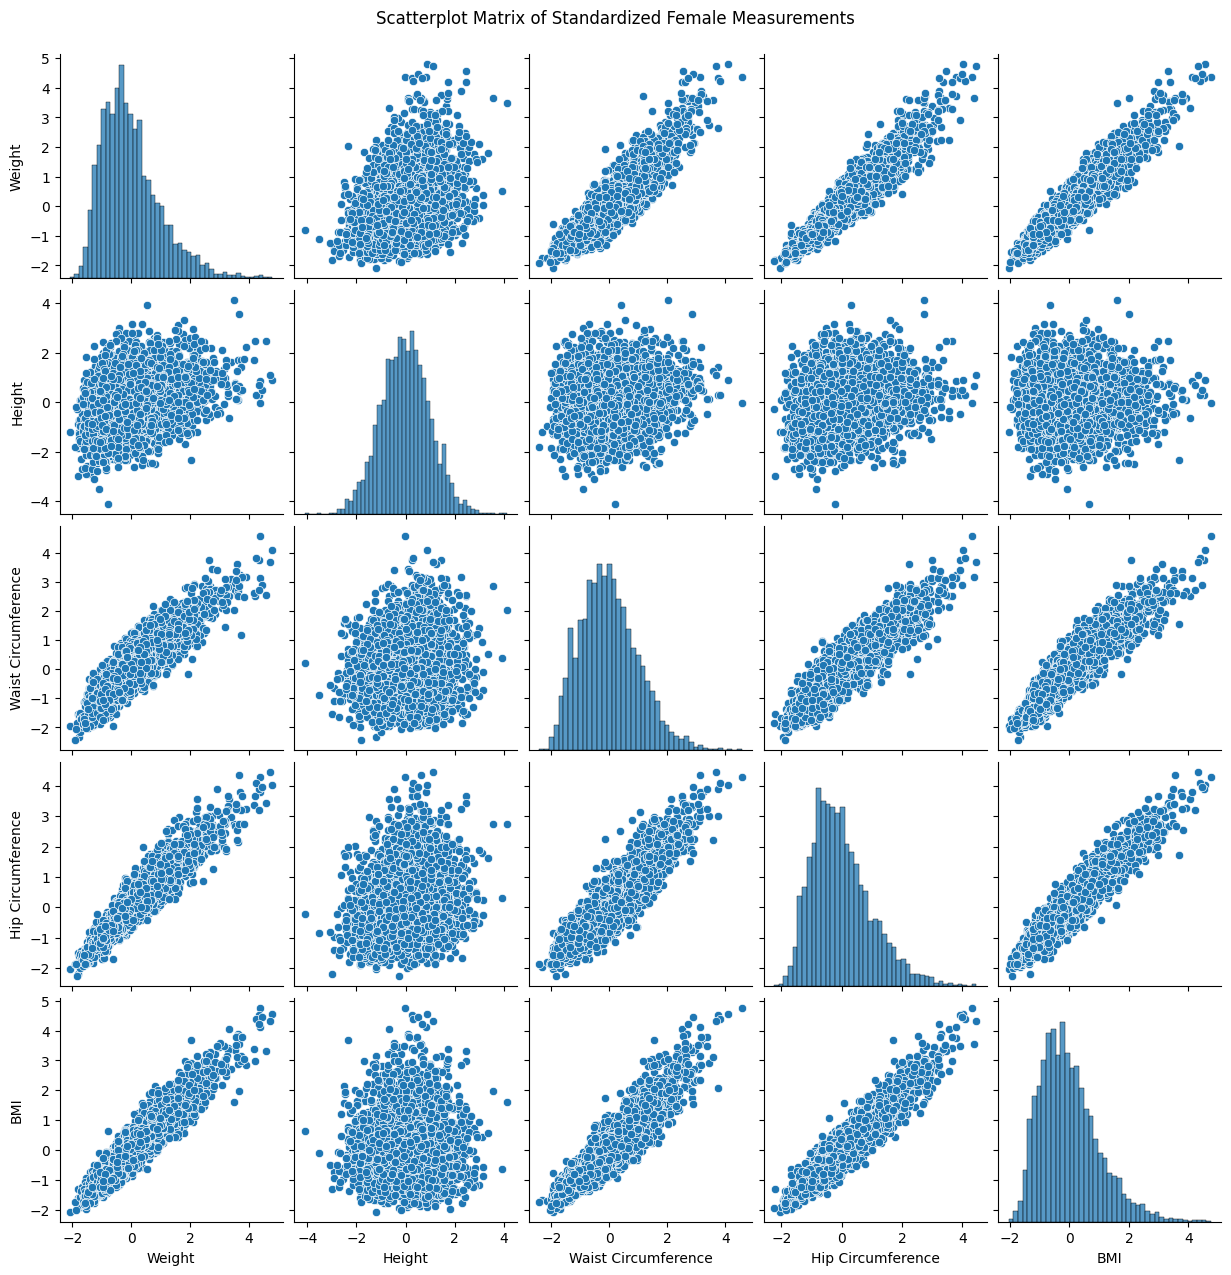

Pearson's Correlation Coefficients:
                        Weight    Height  Arm Length  Leg Length  \
Weight               1.000000  0.345496    0.551563    0.193186   
Height               0.345496  1.000000    0.667911    0.657202   
Arm Length           0.551563  0.667911    1.000000    0.475645   
Leg Length           0.193186  0.657202    0.475645    1.000000   
Arm Circumference    0.905385  0.151955    0.453122    0.079876   
Hip Circumference    0.946553  0.202895    0.459400    0.100268   
Waist Circumference  0.904550  0.126547    0.427893   -0.034803   
BMI                  0.945900  0.033077    0.364660   -0.014819   

                     Arm Circumference  Hip Circumference  \
Weight                        0.905385           0.946553   
Height                        0.151955           0.202895   
Arm Length                    0.453122           0.459400   
Leg Length                    0.079876           0.100268   
Arm Circumference             1.000000           0.868

In [47]:
from scipy.stats import zscore, pearsonr, spearmanr
import seaborn as sns
import pandas as pd

columns = ['Weight', 'Height', 'Arm Length', 'Leg Length', 'Arm Circumference', 'Hip Circumference', 'Waist Circumference', 'BMI']
zfemale_df = pd.DataFrame(zfemale, columns=columns)

# Plotting scatterplot matrix
sns.pairplot(zfemale_df[['Weight', 'Height', 'Waist Circumference', 'Hip Circumference', 'BMI']])
plt.suptitle('Scatterplot Matrix of Standardized Female Measurements', y=1.02)
plt.show()

# Calculating Pearson's correlation coefficient
pearson_corr = zfemale_df.corr(method='pearson')

# Calculating Spearman's correlation coefficient
spearman_corr = zfemale_df.corr(method='spearman')

print("Pearson's Correlation Coefficients:\n", pearson_corr)
print("\nSpearman's Correlation Coefficients:\n", spearman_corr)

def interpret_correlations(corr_matrix, method):
    print(f"\nInterpretation of {method} Correlation Coefficients:")
    for col in corr_matrix.columns:
        for idx in corr_matrix.index:
            if col != idx:
                print(f"The correlation between {col} and {idx} is {corr_matrix.loc[idx, col]:.2f} ({method})")
                

### 9.  Compute the waist circumference to height ratio and the waist circumference to hip circumference ratio of the male and female participants by adding two more columns to the males and females matrices.

Computing ratios for females with their waist to height and waist to hip.

Likewise, computing the ratios for males with their waist to height and waist to hip.

In [23]:
# Computing ratios for female dataset
female_waist_to_height = female_clean[:, 6] / female_clean[:, 1]
female_waist_to_hip = female_clean[:, 6] / female_clean[:, 5]
female_with_ratios = np.column_stack((female_clean, female_waist_to_height, female_waist_to_hip))

# Computing ratios for male dataset
male_waist_to_height = male_clean[:, 6] / male_clean[:, 1]
male_waist_to_hip = male_clean[:, 6] / male_clean[:, 5]
male_with_ratios = np.column_stack((male_clean, male_waist_to_height, male_waist_to_hip))

# Verifying the additions
print("\nFirst few rows of female dataset with ratios:")
print(female_with_ratios[:5])
print("\nFirst few rows of male dataset with ratios:")
print(male_with_ratios[:5])


First few rows of female dataset with ratios:
[[ 97.1        160.2         34.7         40.8         35.8
  126.1        117.9         37.83504078   0.73595506   0.93497224]
 [ 91.1        152.7         33.5         33.          38.5
  125.5        103.1         39.06972037   0.67518009   0.82151394]
 [ 73.         161.2         37.4         38.          31.8
  106.2         92.          28.09265496   0.5707196    0.86629002]
 [ 61.7        157.4         38.          34.7         29.
  101.          90.5         24.90437849   0.57496823   0.8960396 ]
 [ 55.4        154.6         34.6         34.          28.3
   92.5         73.2         23.17879132   0.47347995   0.79135135]]

First few rows of male dataset with ratios:
[[ 98.8        182.3         42.          40.1         38.2
  108.2        120.4          0.66044981   1.11275416]
 [ 74.3        184.2         41.1         41.          30.2
   94.5         86.8          0.47122693   0.91851852]
 [103.7        185.3         47.      

### 10. Draw a box-and-whisker plot with four boxes side by side, comparing the distribution of the waist-to-height ratio and the waist-to-hip ratio of both male and female participants. Explain what you see.

Drawing the box and whisker plots for the calculated ratios of waist to height and waist to hip for both male and female participants from the above program.

At first, we draw the boxplot for the waist-to-height ratio

Next, we draw the boxplots for the waist-to-hip ratio

C:\Users\fahee\AppData\Local\Temp\ipykernel_29040\883396525.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax1.boxplot([female_with_ratios[:, 7], male_with_ratios[:, 7]],
C:\Users\fahee\AppData\Local\Temp\ipykernel_29040\883396525.py:10: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax2.boxplot([female_with_ratios[:, 8], male_with_ratios[:, 8]],


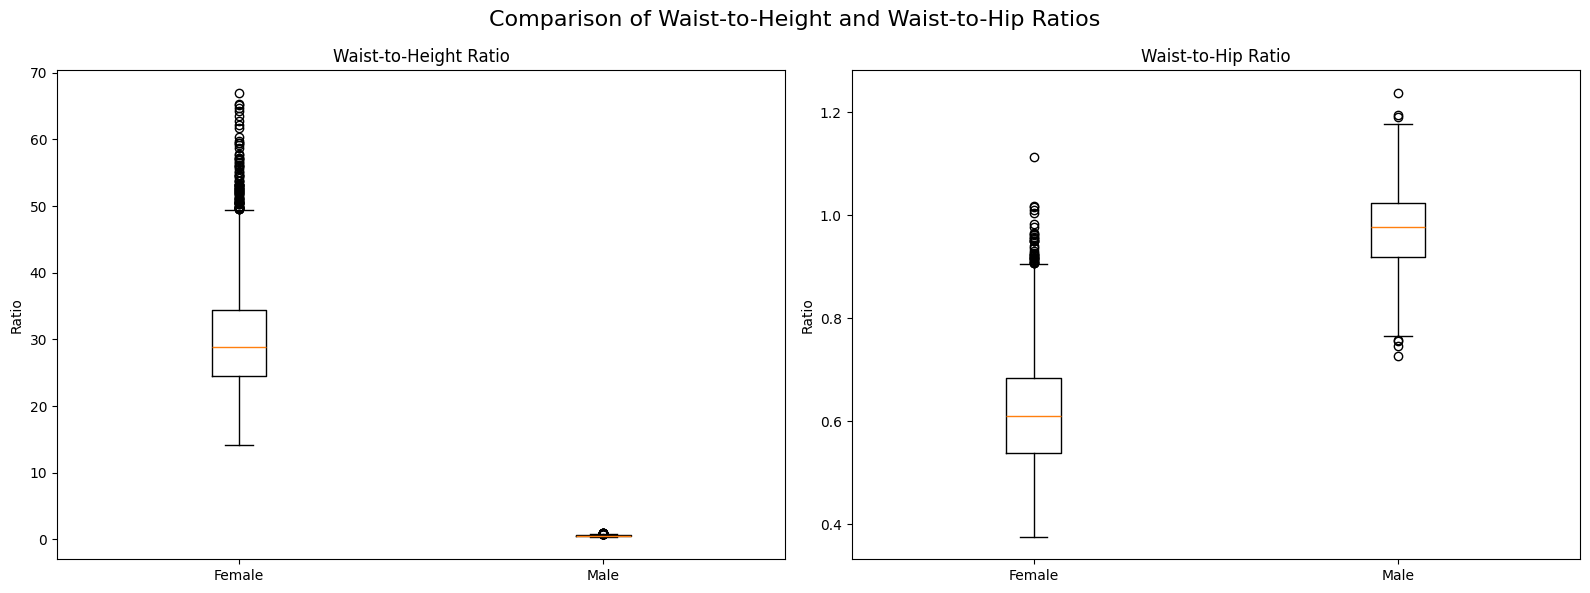

In [28]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Waist-to-Height ratio
ax1.boxplot([female_with_ratios[:, 7], male_with_ratios[:, 7]], 
            labels=['Female', 'Male'])
ax1.set_title('Waist-to-Height Ratio')
ax1.set_ylabel('Ratio')

# Waist-to-Hip ratio
ax2.boxplot([female_with_ratios[:, 8], male_with_ratios[:, 8]], 
            labels=['Female', 'Male'])
ax2.set_title('Waist-to-Hip Ratio')
ax2.set_ylabel('Ratio')

plt.suptitle('Comparison of Waist-to-Height and Waist-to-Hip Ratios', fontsize=16)
plt.tight_layout()
plt.show()

From the above boxplots,

Female Waist-to-Height Ratio;

###### 1) Median: The median (the orange line inside the box) is around 0.6, indicating that the typical waist-to-height ratio for females is 0.6.

###### 2) IQR: The box represents the IQR, which is the range between the first quartile (25th percentile) and the third quartile (75th percentile). For females, the IQR ranges from around 0.5 to 0.7.

###### 3) Outliers: There are a few outliers above the upper whisker, indicating that some females have a higher waist-to-height ratio than the other females.

Male Waist-to-Height Ratio;

###### 1) Median: The median is slightly below 0.6, indicating that the typical waist-to-height ratio for males is slightly lower than for females.

###### 2) IQR: The IQR ranges from around 0.5 to 0.65, which is a bit narrower than the IQR for females, suggesting less variability in waist-to-height ratios among males.

###### 3) Outliers: There are a few outliers above the upper whisker, similar to the female dataset.

Female Waist-to-Hip Ratio;

###### 1) Median: The median is around 0.85, indicating that the typical waist-to-hip ratio for females is 0.85.

###### 2) IQR: The IQR ranges from around 0.75 to 0.95, suggesting some variability in waist-to-hip ratios among females.

###### 3) Outliers: There are some outliers above the upper whisker and below the lower whisker, indicating variability in the waist-to-hip ratio.

Male Waist-to-Hip Ratio;

###### 1) Median: The median is around 1.0, indicating that the typical waist-to-hip ratio for males is higher than for females.

###### 2) IQR: The IQR ranges from around 0.9 to 1.05, suggesting variability in waist-to-hip ratios among males.

###### 3) Outliers: There are outliers above the upper whisker, indicating some males have higher waist-to-hip ratios.


Comparison:

Waist-to-Height Ratio;

###### Both females and males have a similar median waist-to-height ratio, with females being slightly higher.Females show slightly more variability in waist-to-height ratios compared to males. Both genders have a few outliers, indicating higher waist-to-height ratios for some individuals.

Waist-to-Hip Ratio;

###### Males have a higher median waist-to-hip ratio compared to females. Both females and males show variability in their waist-to-hip ratios, with males having a slightly wider IQR. Both genders have outliers, indicating variability in waist-to-hip ratios among individuals.

### 11. In your own words, list some advantages and disadvantages of BMI, waist-to-height ratio, and waist-to-hip ratio.

##### BMI

###### Advantages : Easier to calculate when formula is known and widely used.

###### Disadvantages : Does not distinguish between muscle and fat, can make mistakes in classifying people with high mass of muscles.

#### Waist-to-Height Ratio

###### Advantages: Predicting of cardiovascular risk, simple to measure.

###### Disadvantages: Can vary with posture and time of day.

#### Waist-to-Hip Ratio

###### Advantages: Indicates body fat distribution, associated with risk of heart disease.

###### Disadvantages: Can be influenced by factors such as age and gender.

### 12.  Print out the standardised body measurements for the 5 persons with the lowest BMI and the 5 persons with the 5 highest BMI (e.g., call print for a subset of zfemale comprised of 10 chosen rows as determined by a call to numpy.argsort). Interpret the results.

At first, find the indices of the 5 lowest and highest BMI values using the 'argsort' function from the numpy library.

Next, calculating the lowest and the highest BMI measurments from the lowest and the highest BMI indices of zfemale comrpised of 10 rows.

In [22]:
# Find the indices of the 5 lowest and highest BMI
lowest_bmi_indices = np.argsort(zfemale[:, 7])[:5]
highest_bmi_indices = np.argsort(zfemale[:, 7])[-5:]

# Extract the corresponding rows
lowest_bmi_measurements = zfemale[lowest_bmi_indices]
highest_bmi_measurements = zfemale[highest_bmi_indices]

print("\nStandardized body measurements for the 5 persons with the lowest BMI:")
print(lowest_bmi_measurements)
print("\nStandardized body measurements for the 5 persons with the highest BMI:")
print(highest_bmi_measurements)


Standardized body measurements for the 5 persons with the lowest BMI:
[[-2.07978523 -1.22299143 -1.5478402  -1.16905675 -2.1947611  -2.0405496
  -1.94212128 -2.05024028]
 [-1.88017988 -0.18929313 -1.71835247  0.38637892 -2.4443617  -1.85491922
  -2.05708015 -1.99487987]
 [-1.53667299  1.80730222  0.62619127  0.5730312  -2.26607556 -1.6756899
  -1.7064556  -1.97088383]
 [-1.843044   -0.26009438 -0.22637009  0.51081377 -2.30173278 -2.25178417
  -1.85590213 -1.94177591]
 [-1.61094475  0.88688592 -0.09848588  0.47970506 -2.21258971 -1.82931504
  -1.71220354 -1.89319577]]

Standardized body measurements for the 5 persons with the highest BMI:
[[ 4.2472403   0.29215539  1.86240524 -0.98240447  2.3693641   4.10445598
   3.81731803  4.39649161]
 [ 4.45612963  0.50455915  1.69189297 -1.13794804  3.34993787  3.98283607
   2.90339503  4.46201122]
 [ 4.34936397  0.27799514  2.84285081  1.94181459  4.36616887  3.9188256
   3.75409065  4.51466896]
 [ 4.8042785   0.88688592  2.11817365  1.81737973  

Interpreting the above output, we can understand that,

Variation: There is a clear distinction between the standardized scores of individuals with the lowest BMI and those with the highest BMI, showing a wide range of body measurements within the population.


Weight and BMI Correlation: The z-scores for weight are most extreme in both groups, reinforcing that weight has a strong influence on BMI.

Proportionality: The other body measurements (height, waist circumference, hip circumference, etc.) also show significant deviations from the mean, indicating that BMI is reflective of overall body size and not just weight.

Health Implications:
The individuals with the lowest BMI might be at risk for undernutrition or related health issues due to their significantly low body measurements.
The individuals with the highest BMI might be at risk for obesity-related health issues due to their significantly high body measurements.

## This is the overall code from the beginning consisting of all outputs.

Female data shape: (4222, 7)
Male data shape: (4082, 7)

First few rows of female dataset:
[[ 97.1 160.2  34.7  40.8  35.8 126.1 117.9]
 [ 91.1 152.7  33.5  33.   38.5 125.5 103.1]
 [ 73.  161.2  37.4  38.   31.8 106.2  92. ]
 [ 61.7 157.4  38.   34.7  29.  101.   90.5]
 [ 55.4 154.6  34.6  34.   28.3  92.5  73.2]]

First few rows of male dataset:
[[ 98.8 182.3  42.   40.1  38.2 108.2 120.4]
 [ 74.3 184.2  41.1  41.   30.2  94.5  86.8]
 [103.7 185.3  47.   44.   32.  107.8 109.6]
 [ 86.  167.8  39.5  38.4  29.  106.4 108.3]
 [ 99.4 181.6  40.4  39.9  36.  120.2 107. ]]


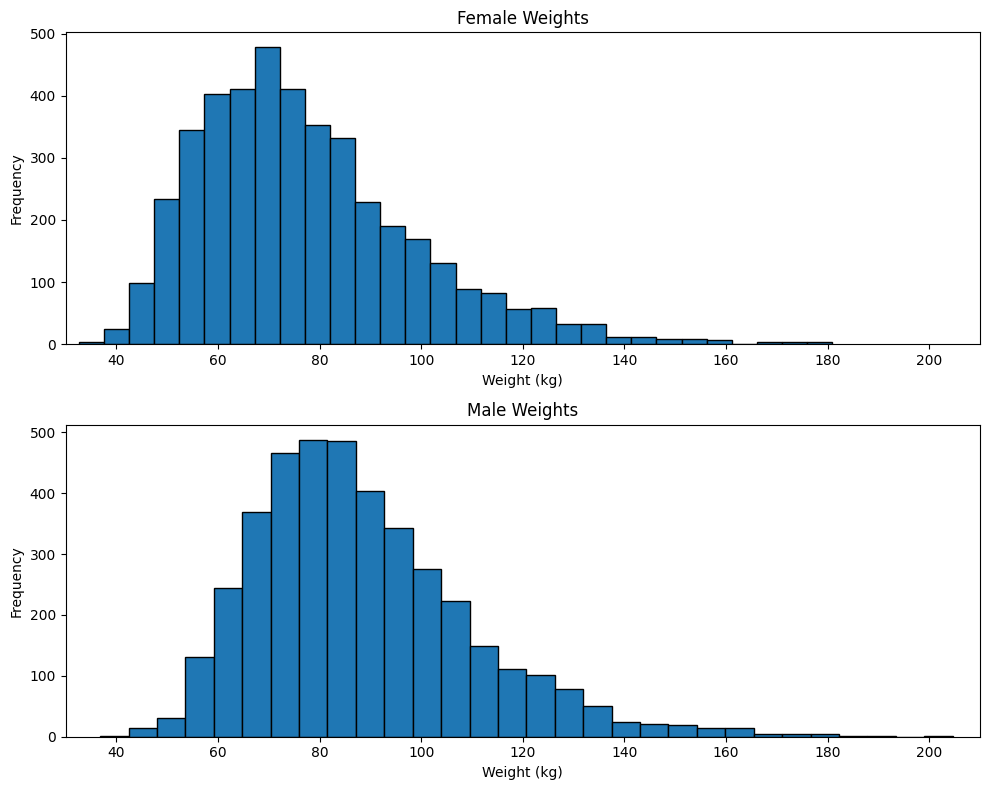

C:\Users\fahee\AppData\Local\Temp\ipykernel_29040\3502058916.py:45: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([female_weights_clean, male_weights_clean], labels=['Female', 'Male'])


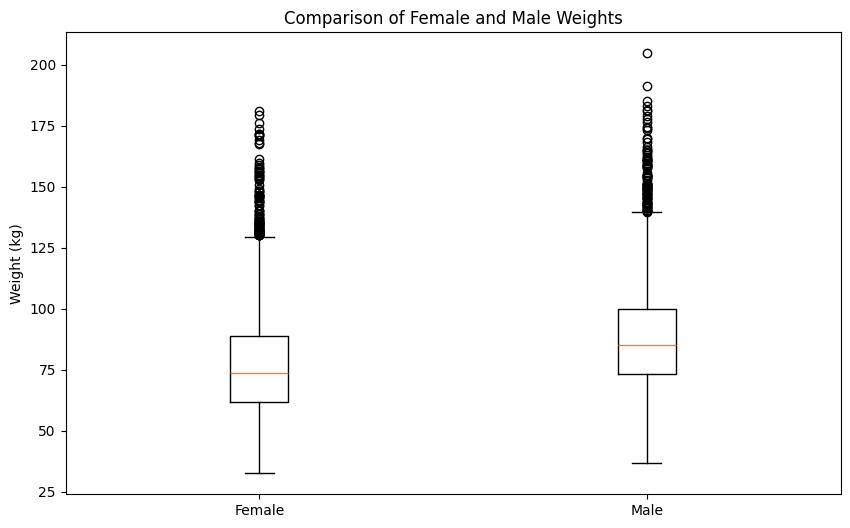

Female Weights - Mean: 77.40, Median: 73.60, Std: 21.54, Variance: 464.08, Skewness: 1.03, Kurtosis: 1.40
Male Weights - Mean: 88.36, Median: 85.00, Std: 21.42, Variance: 458.77, Skewness: 0.98, Kurtosis: 1.47

First few rows of female dataset with BMI:
[[ 97.1        160.2         34.7         40.8         35.8
  126.1        117.9         37.83504078]
 [ 91.1        152.7         33.5         33.          38.5
  125.5        103.1         39.06972037]
 [ 73.         161.2         37.4         38.          31.8
  106.2         92.          28.09265496]
 [ 61.7        157.4         38.          34.7         29.
  101.          90.5         24.90437849]
 [ 55.4        154.6         34.6         34.          28.3
   92.5         73.2         23.17879132]]

First few rows of standardized female dataset (zfemale):
[[ 0.91429508  0.00895038 -0.56739463  1.13298804  0.55084546  1.08316157
   1.11578462  0.9969677 ]
 [ 0.63577599 -1.05306843 -1.07893145 -1.29349161  1.03221804  1.04475528
   

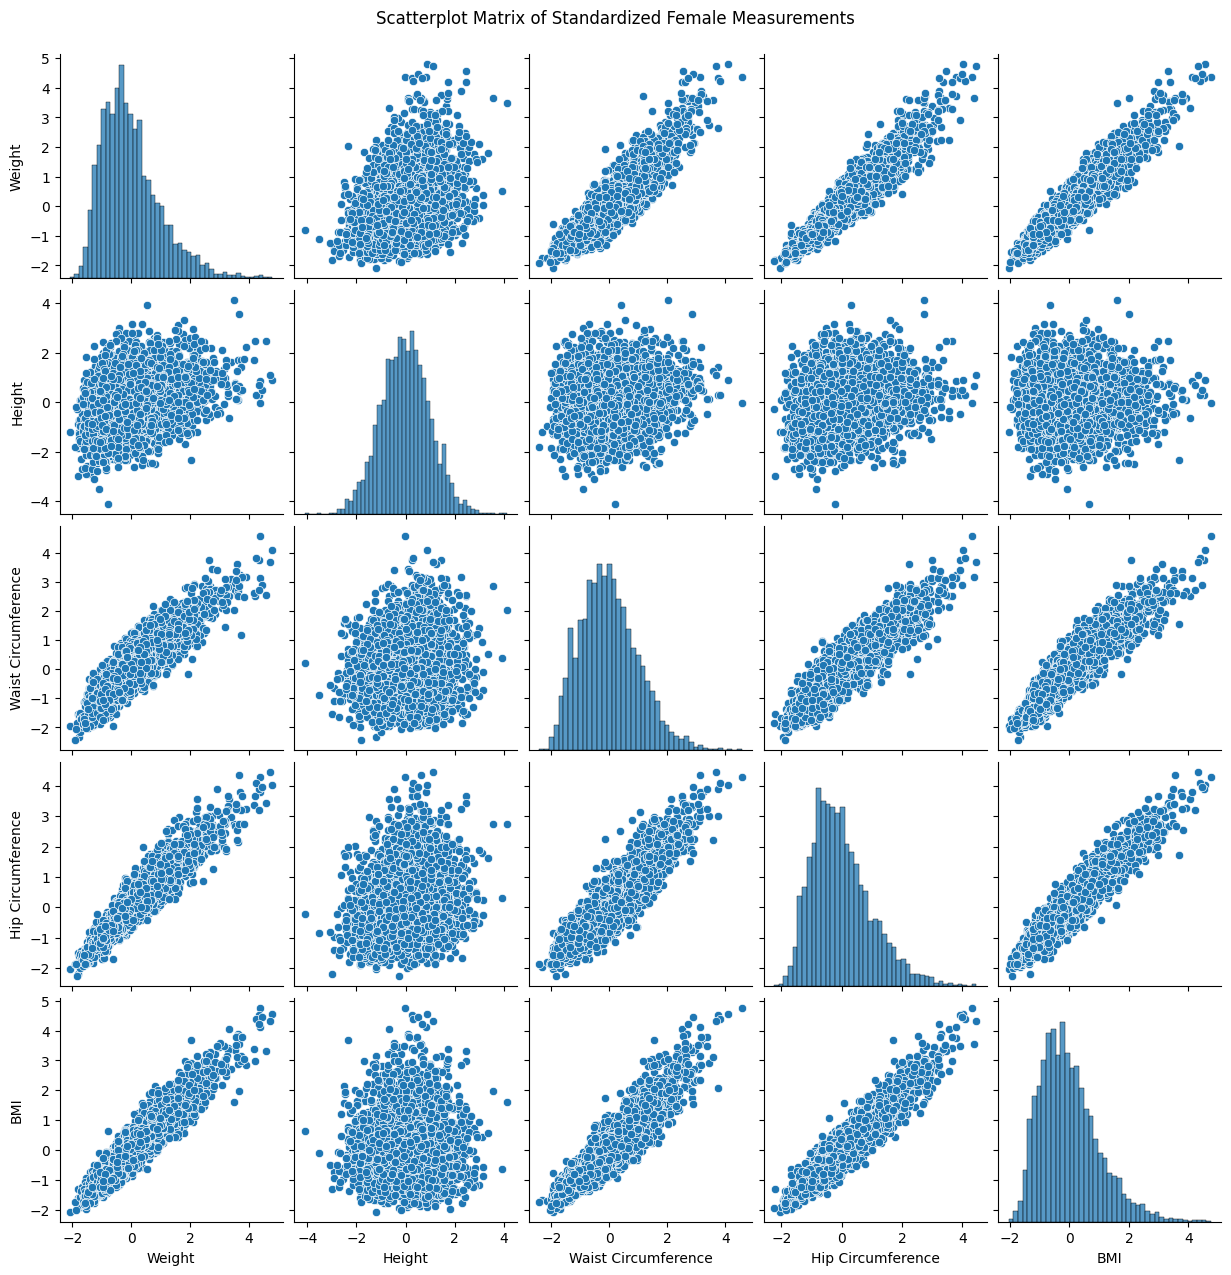

Pearson's Correlation Coefficients:
                        Weight    Height  Arm Length  Leg Length  \
Weight               1.000000  0.345496    0.551563    0.193186   
Height               0.345496  1.000000    0.667911    0.657202   
Arm Length           0.551563  0.667911    1.000000    0.475645   
Leg Length           0.193186  0.657202    0.475645    1.000000   
Arm Circumference    0.905385  0.151955    0.453122    0.079876   
Hip Circumference    0.946553  0.202895    0.459400    0.100268   
Waist Circumference  0.904550  0.126547    0.427893   -0.034803   
BMI                  0.945900  0.033077    0.364660   -0.014819   

                     Arm Circumference  Hip Circumference  \
Weight                        0.905385           0.946553   
Height                        0.151955           0.202895   
Arm Length                    0.453122           0.459400   
Leg Length                    0.079876           0.100268   
Arm Circumference             1.000000           0.868

C:\Users\fahee\AppData\Local\Temp\ipykernel_29040\3502058916.py:105: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax1.boxplot([female_with_ratios[:, 7], male_with_ratios[:, 7]],
C:\Users\fahee\AppData\Local\Temp\ipykernel_29040\3502058916.py:109: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax2.boxplot([female_with_ratios[:, 8], male_with_ratios[:, 8]],


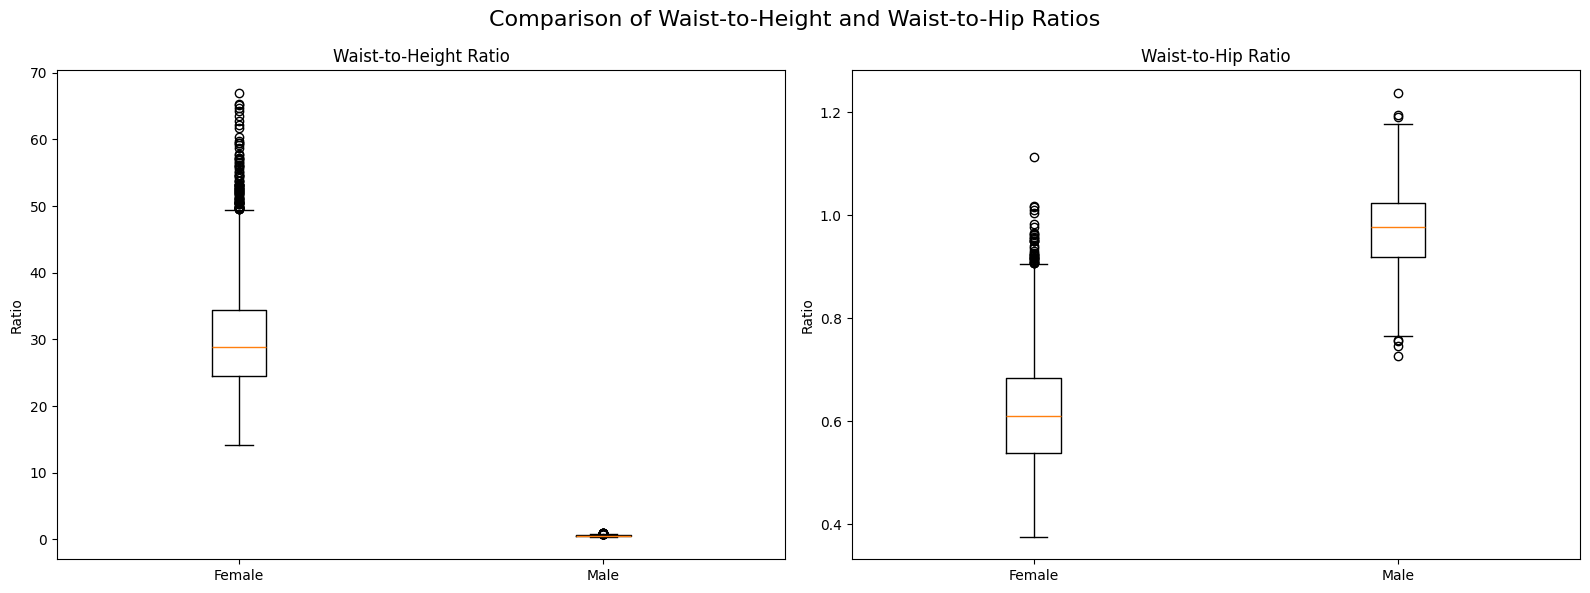


Standardized body measurements for the 5 persons with the lowest BMI:
[[-2.07978523 -1.22299143 -1.5478402  -1.16905675 -2.1947611  -2.0405496
  -1.94212128 -2.05024028]
 [-1.88017988 -0.18929313 -1.71835247  0.38637892 -2.4443617  -1.85491922
  -2.05708015 -1.99487987]
 [-1.53667299  1.80730222  0.62619127  0.5730312  -2.26607556 -1.6756899
  -1.7064556  -1.97088383]
 [-1.843044   -0.26009438 -0.22637009  0.51081377 -2.30173278 -2.25178417
  -1.85590213 -1.94177591]
 [-1.61094475  0.88688592 -0.09848588  0.47970506 -2.21258971 -1.82931504
  -1.71220354 -1.89319577]]

Standardized body measurements for the 5 persons with the highest BMI:
[[ 4.2472403   0.29215539  1.86240524 -0.98240447  2.3693641   4.10445598
   3.81731803  4.39649161]
 [ 4.45612963  0.50455915  1.69189297 -1.13794804  3.34993787  3.98283607
   2.90339503  4.46201122]
 [ 4.34936397  0.27799514  2.84285081  1.94181459  4.36616887  3.9188256
   3.75409065  4.51466896]
 [ 4.8042785   0.88688592  2.11817365  1.81737973  

In [29]:
import numpy as np
from scipy.stats import zscore, pearsonr, spearmanr
import seaborn as sns
import pandas as pd
from scipy.stats import skew, kurtosis
from scipy.stats import zscore
column_names = ['BMXWT', 'BMXHT', 'BMXARML', 'BMXLEG', 'BMXARMC', 'BMXHIP', 'BMXWAIST']
file_female = r'C:\Users\fahee\Dataset\archive\nhanes_adult_female_bmx_2020.csv'
file_male = r'C:\Users\fahee\Dataset\archive\nhanes_adult_male_bmx_2020.csv'
female = np.genfromtxt(file_female, delimiter=',', skip_header=1)
male = np.genfromtxt(file_male, delimiter=',', skip_header=1)

print("Female data shape:", female.shape)
print("Male data shape:", male.shape)
female_clean = female[~np.isnan(female).any(axis=1)]
male_clean = male[~np.isnan(male).any(axis=1)]
print("\nFirst few rows of female dataset:")
print(female_clean[:5])
print("\nFirst few rows of male dataset:")
print(male_clean[:5])

min_weight = min(np.min(female_clean[:, 0]), np.min(male_clean[:, 0]))
max_weight = max(np.max(female_clean[:, 0]), np.max(male_clean[:, 0]))
x_min = np.floor(min_weight / 10) * 10
x_max = np.ceil(max_weight / 10) * 10
plt.figure(figsize=(10, 8))
plt.subplot(2, 1, 1)
plt.hist(female_clean[:, 0], bins=30, edgecolor='black')
plt.title('Female Weights')
plt.xlabel('Weight (kg)')
plt.ylabel('Frequency')
plt.xlim(x_min, x_max)  
plt.subplot(2, 1, 2)
plt.hist(male_clean[:, 0], bins=30, edgecolor='black')
plt.title('Male Weights')
plt.xlabel('Weight (kg)')
plt.ylabel('Frequency')
plt.xlim(x_min, x_max)  
plt.tight_layout()
plt.show()

female_weights_clean = female[:, 0][~np.isnan(female[:, 0])]
male_weights_clean = male[:, 0][~np.isnan(male[:, 0])]
plt.figure(figsize=(10, 6))
plt.boxplot([female_weights_clean, male_weights_clean], labels=['Female', 'Male'])
plt.title('Comparison of Female and Male Weights')
plt.ylabel('Weight (kg)')
plt.show()

mean_female = np.mean(female_weights_clean)
median_female = np.median(female_weights_clean)
mean_male = np.mean(male_weights_clean)
median_male = np.median(male_weights_clean)
std_female = np.std(female_weights_clean)
var_female = np.var(female_weights_clean)
std_male = np.std(male_weights_clean)
var_male = np.var(male_weights_clean)
skew_female = skew(female_weights_clean)
kurtosis_female = kurtosis(female_weights_clean)
skew_male = skew(male_weights_clean)
kurtosis_male = kurtosis(male_weights_clean)
print("Female Weights - Mean: {:.2f}, Median: {:.2f}, Std: {:.2f}, Variance: {:.2f}, Skewness: {:.2f}, Kurtosis: {:.2f}".format(
    mean_female, median_female, std_female, var_female, skew_female, kurtosis_female))
print("Male Weights - Mean: {:.2f}, Median: {:.2f}, Std: {:.2f}, Variance: {:.2f}, Skewness: {:.2f}, Kurtosis: {:.2f}".format(
    mean_male, median_male, std_male, var_male, skew_male, kurtosis_male))

female_bmi = female_weights_clean / (female_heights_clean / 100) ** 2
female_with_bmi = np.column_stack((female_clean, female_bmi))
print("\nFirst few rows of female dataset with BMI:")
print(female_with_bmi[:5])

female_clean = female_with_bmi[~np.isnan(female_with_bmi).any(axis=1)]
zfemale = zscore(female_clean, axis=0)
print("\nFirst few rows of standardized female dataset (zfemale):")
print(zfemale[:5])

columns = ['Weight', 'Height', 'Arm Length', 'Leg Length', 'Arm Circumference', 'Hip Circumference', 'Waist Circumference', 'BMI']
zfemale_df = pd.DataFrame(zfemale, columns=columns)
sns.pairplot(zfemale_df[['Weight', 'Height', 'Waist Circumference', 'Hip Circumference', 'BMI']])
plt.suptitle('Scatterplot Matrix of Standardized Female Measurements', y=1.02)
plt.show()
pearson_corr = zfemale_df.corr(method='pearson')
spearman_corr = zfemale_df.corr(method='spearman')
print("Pearson's Correlation Coefficients:\n", pearson_corr)
print("\nSpearman's Correlation Coefficients:\n", spearman_corr)
def interpret_correlations(corr_matrix, method):
    print(f"\nInterpretation of {method} Correlation Coefficients:")
    for col in corr_matrix.columns:
        for idx in corr_matrix.index:
            if col != idx:
                print(f"The correlation between {col} and {idx} is {corr_matrix.loc[idx, col]:.2f} ({method})")
                
female_waist_to_height = female_clean[:, 6] / female_clean[:, 1]
female_waist_to_hip = female_clean[:, 6] / female_clean[:, 5]
female_with_ratios = np.column_stack((female_clean, female_waist_to_height, female_waist_to_hip))
male_waist_to_height = male_clean[:, 6] / male_clean[:, 1]
male_waist_to_hip = male_clean[:, 6] / male_clean[:, 5]
male_with_ratios = np.column_stack((male_clean, male_waist_to_height, male_waist_to_hip))
print("\nFirst few rows of female dataset with ratios:")
print(female_with_ratios[:5])
print("\nFirst few rows of male dataset with ratios:")
print(male_with_ratios[:5])

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
ax1.boxplot([female_with_ratios[:, 7], male_with_ratios[:, 7]], 
            labels=['Female', 'Male'])
ax1.set_title('Waist-to-Height Ratio')
ax1.set_ylabel('Ratio')
ax2.boxplot([female_with_ratios[:, 8], male_with_ratios[:, 8]], 
            labels=['Female', 'Male'])
ax2.set_title('Waist-to-Hip Ratio')
ax2.set_ylabel('Ratio')
plt.suptitle('Comparison of Waist-to-Height and Waist-to-Hip Ratios', fontsize=16)
plt.tight_layout()
plt.show()

lowest_bmi_indices = np.argsort(zfemale[:, 7])[:5]
highest_bmi_indices = np.argsort(zfemale[:, 7])[-5:]
lowest_bmi_measurements = zfemale[lowest_bmi_indices]
highest_bmi_measurements = zfemale[highest_bmi_indices]
print("\nStandardized body measurements for the 5 persons with the lowest BMI:")
print(lowest_bmi_measurements)
print("\nStandardized body measurements for the 5 persons with the highest BMI:")
print(highest_bmi_measurements)